In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the datasets
red_wine = pd.read_csv(r"C:\Users\ADMIN\Downloads\wine+quality\winequality-red.csv", sep = ';')
white_wine = pd.read_csv(r"C:\Users\ADMIN\Downloads\wine+quality\winequality-white.csv", sep = ';')

In [3]:
# renaming the columns
white_wine.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

red_wine.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

In [4]:
# Function to generate detailed univariate summary with quantiles
def univariate_summary(df):
    summary = pd.DataFrame({
        'Mean': df.mean(),
        'Std': df.std(),
        'Min': df.min(),
        '25% (Q1)': df.quantile(0.25),
        '50% (Median)': df.median(),
        '75% (Q3)': df.quantile(0.75),
        'Max': df.max(),
        'Skewness': df.skew(),
        'Kurtosis': df.kurtosis()
    })
    return summary.round(3)  # Rounded for neatness

# Create summaries
red_summary = univariate_summary(red_wine)
white_summary = univariate_summary(white_wine)

# Display summaries
print("\n--- Red Wine Univariate Summary ---\n")
red_summary



--- Red Wine Univariate Summary ---



,Mean,Std,Min,25% (Q1),50% (Median),75% (Q3),Max,Skewness,Kurtosis
fixed_acidity,8.320,1.741,4.600,7.100,7.900,9.200,15.900,0.983,1.132
volatile_acidity,0.528,0.179,0.120,0.390,0.520,0.640,1.580,0.672,1.226
citric_acid,0.271,0.195,0.000,0.090,0.260,0.420,1.000,0.318,-0.789
residual_sugar,2.539,1.410,0.900,1.900,2.200,2.600,15.500,4.541,28.618
chlorides,0.087,0.047,0.012,0.070,0.079,0.090,0.611,5.680,41.716
free_sulfur_dioxide,15.875,10.460,1.000,7.000,14.000,21.000,72.000,1.251,2.024
total_sulfur_dioxide,46.468,32.895,6.000,22.000,38.000,62.000,289.000,1.516,3.810
density,0.997,0.002,0.990,0.996,0.997,0.998,1.004,0.071,0.934
pH,3.311,0.154,2.740,3.210,3.310,3.400,4.010,0.194,0.807
sulphates,0.658,0.170,0.330,0.550,0.620,0.730,2.000,2.429,11.720


In [ ]:
# distribution plots for red wine's features
plt.figure(figsize=(10, 6))
for col in red_wine.columns:
 sns.histplot(red_wine[col], kde=True, bins=15)
 plt.suptitle(f"Distribution of {col} in Red Wine")
 plt.show()

# distribution plots for white wine's features
plt.figure(figsize=(10, 6))
for col in red_wine.columns:
 sns.histplot(white_wine[col], kde=True, bins=15)
 plt.suptitle(f"Distribution of {col} in White Wine")
 plt.show() 

In [ ]:
# distribution kdeplots for white wine's features
plt.figure(figsize=(10, 6))
for col in white_wine.columns:
 sns.kdeplot(white_wine[col], fill =True, color='orange', bw_adjust=1.0)
 plt.suptitle(f"Distribution of {col} in White Wine")
 plt.show()

# distribution kdeplots for red wine's features
plt.figure(figsize=(10, 6))
for col in red_wine.columns:
 sns.kdeplot(red_wine[col], fill =True, color='orange', bw_adjust=1.0)
 plt.suptitle(f"Distribution of {col} in red Wine")
 plt.show()

In [ ]:
# boxplots for red wine's features
plt.figure(figsize=(10, 6))
for col in red_wine.columns:
    sns.boxplot(y=col, data=red_wine, color='orange', orient='h', )
    plt.title(f"Boxplot of {col} in Red Wine")
    plt.show()

# boxplots for white wine's features
plt.figure(figsize=(10, 6))
for col in white_wine.columns:
    sns.boxplot(y=col, data=white_wine, color='orange', orient='h', )
    plt.title(f"Boxplot of {col} in Red Wine")
    plt.show()

In [ ]:
# bar plot for red wine's quality
sns.countplot(x='quality', data= red_wine, color='orange')
plt.title('Count of Quality Ratings in Red Wine')
plt.show()

# bar plot for white wine's quality
sns.countplot(x='quality', data= white_wine, color='orange')
plt.title('Count of Quality Ratings in White Wine')
plt.show()

In [ ]:
# correlation coefficients for red wine features
correlation = red_wine.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap= 'coolwarm', fmt = '.2f')
plt.show()

# correlation coefficients for white wine features
correlation = white_wine.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap= 'coolwarm', fmt = '.2f')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
target_column = 'quality'  # Change this to your target column if different

for col in white_wine.columns:
    if col != target_column:  # Skip plotting the target against itself
        sns.boxplot(y=white_wine[col], x=white_wine[target_column], color='orange')
        plt.title(f"Scatter plot of {col} vs {target_column} in White Wine")
        plt.xlabel(col)
        plt.ylabel(target_column)
        plt.show()

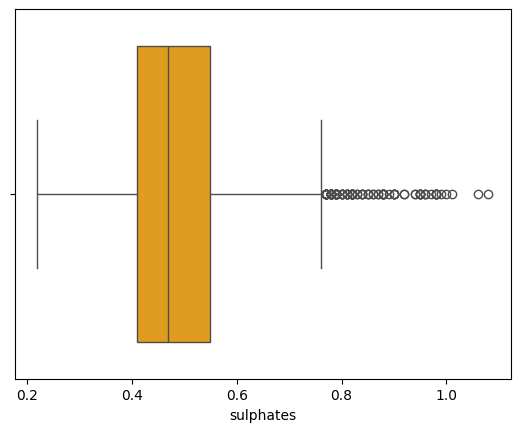

In [50]:
sns.boxplot(data=white_wine, x='sulphates',color='orange')
plt.show()

In [ ]:
# excluding the target variable from the features (white wine) to be transformed 
# Step 1: Exclude the unwanted feature
feature_to_exclude = 'quality'
features_to_transform = white_wine.drop(columns=[feature_to_exclude])

# Step 2: Apply log transform to the remaining features
features_transformed = np.log1p(features_to_transform)

# Step 3: Reattach the excluded feature
df_transformed = pd.concat([features_transformed, white_wine[feature_to_exclude]], axis=1)
 

In [55]:
df_transformed.head(3)  # Display the first few rows of the transformed DataFrame

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,2.079442,0.239017,0.307485,3.077312,0.044017,3.828641,5.141664,0.693647,1.386294,0.371564,2.282382,6
1,1.987874,0.262364,0.292670,0.955511,0.047837,2.708050,4.890349,0.690143,1.458615,0.398776,2.351375,6
2,2.208274,0.246860,0.336472,2.066863,0.048790,3.433987,4.584967,0.690694,1.449269,0.364643,2.406945,6


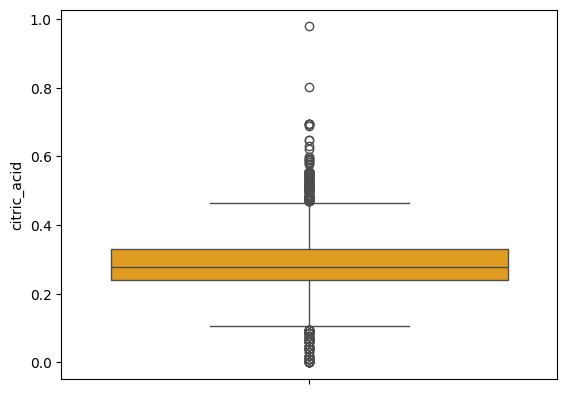

In [61]:
sns.boxplot(data = df_transformed, y ='citric_acid', color='orange')
plt.show()


# Key EDA Insights:
- White wines are generally sweeter, less dense, more acidic, and preserved with more sulfur dioxide
- Red wines tend to have higher fixed acidity, higher volatile acidity, more chlorides (salt), and higher sulphates
- Both wines show some extreme outliers especially in residual sugar, chlorides, and sulphates
- Quality ratings are similar, but white wines are slightly better rated on average

# Summary Business Insights by Wine Type:
**White Wine**
- Alcohol and Citric Acid positively impact quality.
- Slight acidity (via fixed acidity) improves perception — aim for a crisp, refreshing profile.
- Residual sugar has minimal effect — slight sweetness acceptable.
- Sulphates help improve microbial stability without harming quality.

**Red Wine**
- Alcohol still boosts quality, but high volatile acidity, chlorides, and density hurt quality more significantly.
- Fixed acidity and citric acid don’t help as much — aim for smoothness and lower sharpness.
- Stronger penalty for excessive sulfur dioxide.
- Consider lowering density through better sugar fermentation.

